# UNEMPLOYEMENT RATE IN INDIA Project  

Industry-OASIS INFOBYTE

Contribution-Individual

Member Name-ASSALA IDDOUB

# Project Overview:


The project aims to analyze the changes in unemployment rates during the COVID-19 pandemic. By examining the unemployment rate, which is the number of unemployed individuals as a percentage of the total labor force, we can gain insights into the economic impact of the pandemic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error


In [4]:
# Load the dataset (assume a CSV file with unemployment data)
data = pd.read_csv('C:\\Users\\Assala\\Dropbox\\PC\\Downloads\\unemployment in india.csv')

In [8]:
# Display the first few rows of the dataset
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [9]:
# Check for missing values
print(data.isna().sum())


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [10]:
#check the rows and colomns
data.shape

(768, 7)

In [11]:
#display information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [12]:
#Hide memory usage
data.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)

# Statistical description

In [13]:
#display colomns labels
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [14]:
#statistical description
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [15]:
#count missing value for each column
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [16]:
data.dropna(axis=0,inplace=True)

In [17]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [19]:
#Display unique region
unique_Region= data['Region'].unique()
print(unique_Region)

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']


In [20]:
print(data.isnull())

     Region   Date   Frequency   Estimated Unemployment Rate (%)  \
0     False  False       False                             False   
1     False  False       False                             False   
2     False  False       False                             False   
3     False  False       False                             False   
4     False  False       False                             False   
..      ...    ...         ...                               ...   
749   False  False       False                             False   
750   False  False       False                             False   
751   False  False       False                             False   
752   False  False       False                             False   
753   False  False       False                             False   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0                  False                                     False  False  
1                  False       

In [25]:
#display the count of missing values per column.
print("For the dataset-Unemployment in India: ")
print(data.isnull().sum())

For the dataset-Unemployment in India: 
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


# EXPLORATORY ANALYSIS

In [28]:
#Display column_names
column_names=data.columns
print(column_names)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [32]:
#check and remove extra spaces
data.columns=data.columns.str.strip()


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [34]:
#confirm the changes
column_names_after_stripping = data.columns
print(column_names_after_stripping)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [33]:
# employed variety in each region
data.groupby('Region')['Estimated Employed'].mean()

Region
Andhra Pradesh      8.154093e+06
Assam               5.354772e+06
Bihar               1.236619e+07
Chandigarh          3.168312e+05
Chhattisgarh        4.303499e+06
Delhi               2.627513e+06
Goa                 2.263083e+05
Gujarat             1.140201e+07
Haryana             3.557072e+06
Himachal Pradesh    1.059824e+06
Jammu & Kashmir     1.799932e+06
Jharkhand           4.469240e+06
Karnataka           1.066712e+07
Kerala              4.425900e+06
Madhya Pradesh      1.111548e+07
Maharashtra         1.999020e+07
Meghalaya           6.897368e+05
Odisha              6.545747e+06
Puducherry          2.122781e+05
Punjab              4.539362e+06
Rajasthan           1.004106e+07
Sikkim              1.068807e+05
Tamil Nadu          1.226955e+07
Telangana           7.939663e+06
Tripura             7.170026e+05
Uttar Pradesh       2.809483e+07
Uttarakhand         1.390228e+06
West Bengal         1.719854e+07
Name: Estimated Employed, dtype: float64

In [37]:
#unisque frequency in column
uniquefrequencies = data['Frequency'].unique()
print(uniquefrequencies)

[' Monthly' 'Monthly']


In [38]:
#propotion of data point  for both rural and urban area in area column
area = data['Area'].value_counts(normalize=True)
print(area)

Urban    0.514865
Rural    0.485135
Name: Area, dtype: float64


In [39]:
#counf of unique region
uniqueregionscount = data['Region'].nunique()
print(uniqueregionscount)

28


In [40]:
#median for employed people in each region
median_employed_by_region = data.groupby('Region')['Estimated Employed'].median()
print(median_employed_by_region)

Region
Andhra Pradesh       6873608.0
Assam                1731070.5
Bihar                8649591.5
Chandigarh            322063.0
Chhattisgarh         3934763.5
Delhi                1261275.5
Goa                   213440.0
Gujarat             10679732.0
Haryana              3379691.5
Himachal Pradesh      615690.5
Jammu & Kashmir      2049617.0
Jharkhand            2904030.5
Karnataka            9278117.5
Kerala               4603603.0
Madhya Pradesh       9967265.5
Maharashtra         17441540.5
Meghalaya             803118.0
Odisha               4078459.0
Puducherry            184228.5
Punjab               3664804.5
Rajasthan            9217777.0
Sikkim                 89702.0
Tamil Nadu          12139181.0
Telangana            6596048.0
Tripura               562677.0
Uttar Pradesh       26384943.5
Uttarakhand           989470.0
West Bengal         14547931.5
Name: Estimated Employed, dtype: float64


In [41]:
#the average Estimated Unemployment Rate (%) for each Frequency category
average_unemployment_rate_by_frequency = data.groupby('Frequency')['Estimated Unemployment Rate (%)'].mean()
print(average_unemployment_rate_by_frequency)

Frequency
 Monthly    10.324791
Monthly     13.166614
Name: Estimated Unemployment Rate (%), dtype: float64


In [42]:
#median for estimated employee for each region
median_employed_by_region = data.groupby('Region')['Estimated Employed'].median()
print(median_employed_by_region)

Region
Andhra Pradesh       6873608.0
Assam                1731070.5
Bihar                8649591.5
Chandigarh            322063.0
Chhattisgarh         3934763.5
Delhi                1261275.5
Goa                   213440.0
Gujarat             10679732.0
Haryana              3379691.5
Himachal Pradesh      615690.5
Jammu & Kashmir      2049617.0
Jharkhand            2904030.5
Karnataka            9278117.5
Kerala               4603603.0
Madhya Pradesh       9967265.5
Maharashtra         17441540.5
Meghalaya             803118.0
Odisha               4078459.0
Puducherry            184228.5
Punjab               3664804.5
Rajasthan            9217777.0
Sikkim                 89702.0
Tamil Nadu          12139181.0
Telangana            6596048.0
Tripura               562677.0
Uttar Pradesh       26384943.5
Uttarakhand           989470.0
West Bengal         14547931.5
Name: Estimated Employed, dtype: float64


# VISUALIZE DATA

<ipython-input-46-ec24475538db>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


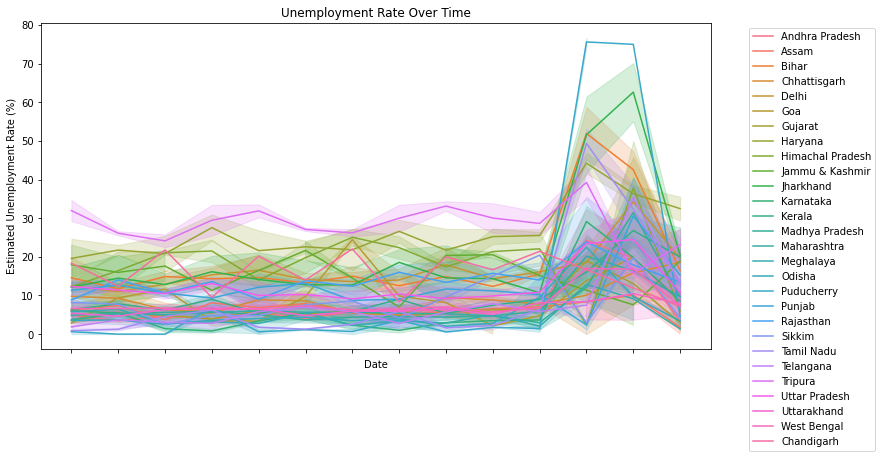

In [46]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.title('Unemployment Rate Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  #to make the legend outside the plot
plt.show()

In [49]:
# Correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.222876   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.222876   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.011300   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Employed                                                      0.011300  
Estimated Labour Participation Rate (%)                                 1.000000  


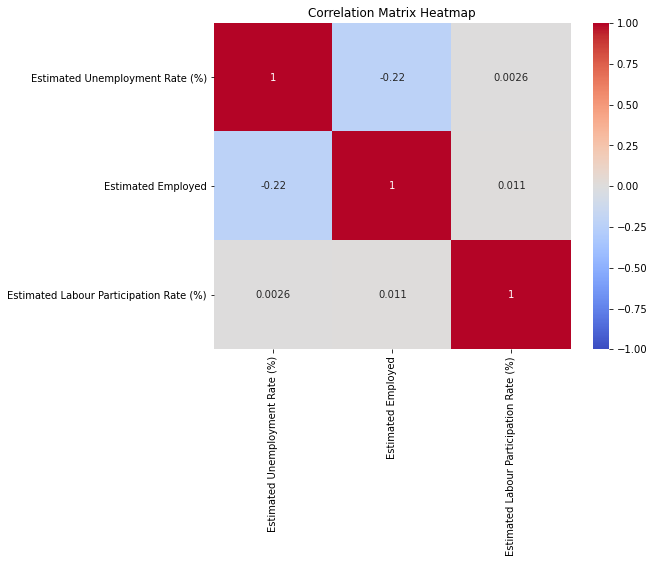

In [50]:
# Heatmap for the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


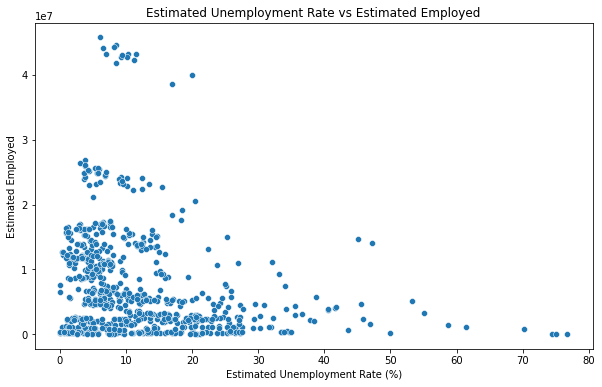

In [52]:
# Scatter plot between Estimated Unemployment Rate and Estimated Employed

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Unemployment Rate (%)', y='Estimated Employed', data=data)
plt.title('Estimated Unemployment Rate vs Estimated Employed')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Employed')
plt.show()

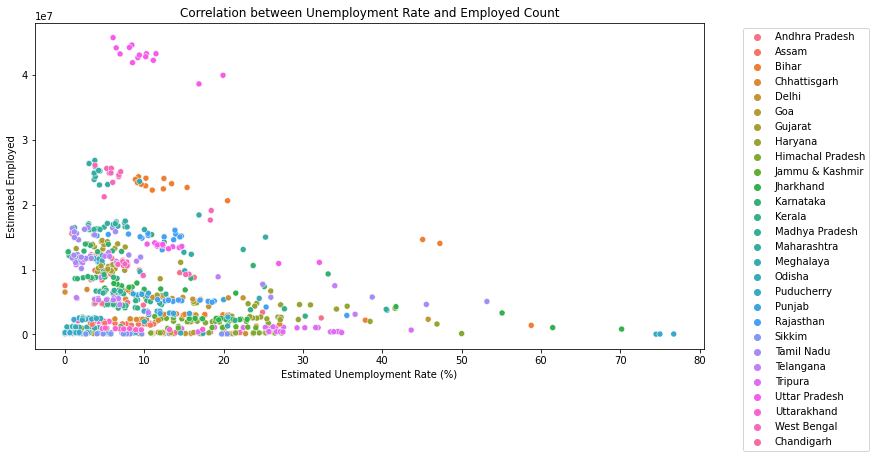

In [57]:
# correlation between unemployement rate and employed count

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Estimated Unemployment Rate (%)', y='Estimated Employed', hue='Region')
plt.title('Correlation between Unemployment Rate and Employed Count')
# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


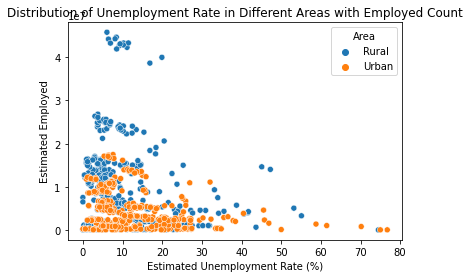

In [58]:
# distribution of Unemployment Rate in different Areas considering Employed count

sns.scatterplot(data=data, x='Estimated Unemployment Rate (%)', y='Estimated Employed', hue='Area')
plt.title('Distribution of Unemployment Rate in Different Areas with Employed Count')
plt.show()


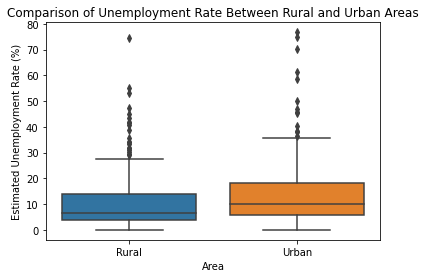

In [59]:
#comparisin of unemployement rate between rural abd urban area

sns.boxplot(data=data, x='Area', y='Estimated Unemployment Rate (%)')
plt.title('Comparison of Unemployment Rate Between Rural and Urban Areas')
plt.show()

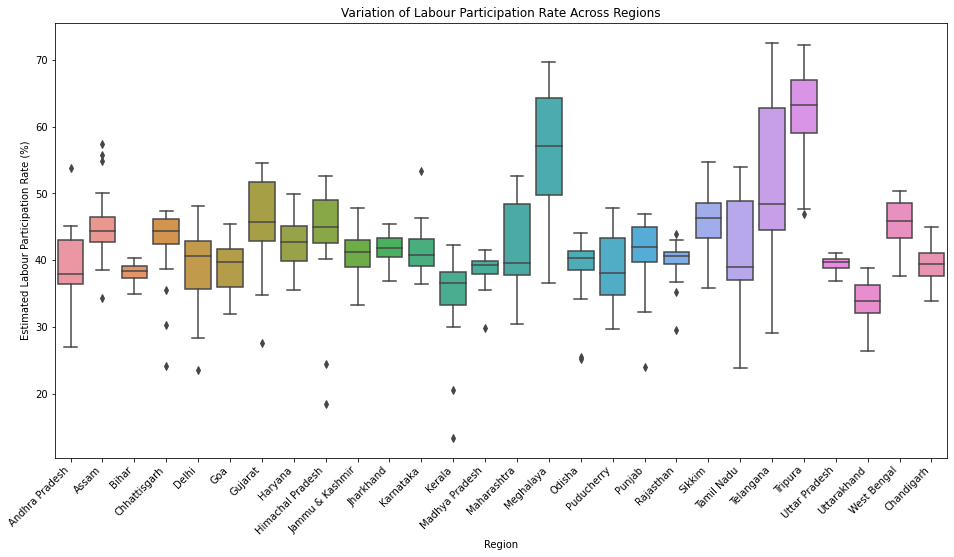

In [70]:
#Labour Participation Rate vary across different Regions

plt.figure(figsize=(16, 8))
plot = sns.boxplot(data=data, x='Region', y='Estimated Labour Participation Rate (%)')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Variation of Labour Participation Rate Across Regions')
plt.show()

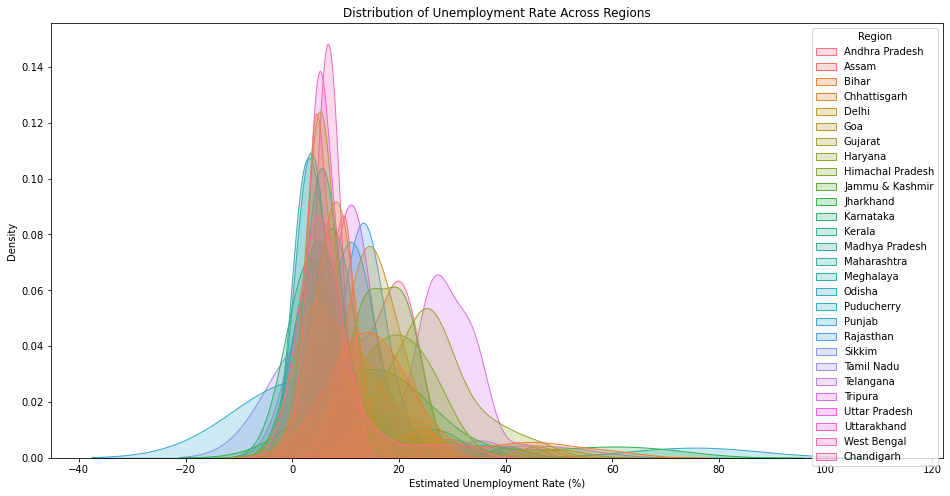

In [60]:
#distribution of unemployement rate across Regions
plt.figure(figsize=(16, 8))
sns.kdeplot(data=data, x='Estimated Unemployment Rate (%)', hue='Region', fill=True, common_norm=False)
plt.title('Distribution of Unemployment Rate Across Regions')
plt.show()

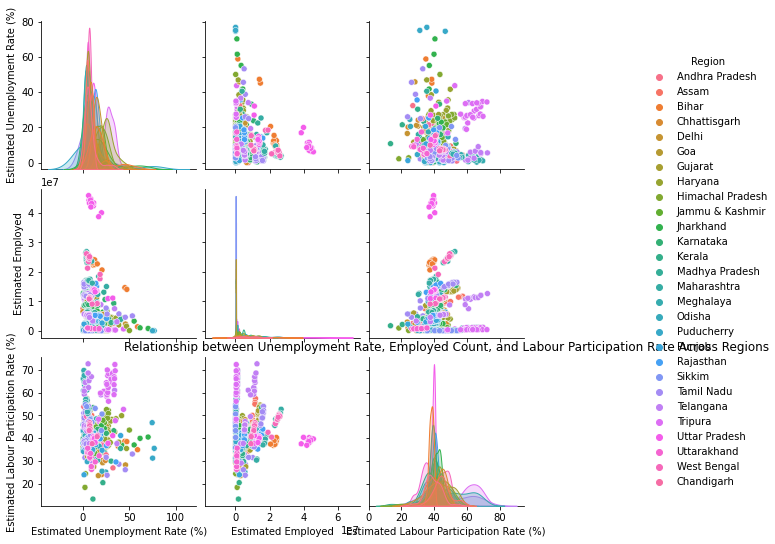

In [61]:
# relationship between Unemployment Rate, Employed count, and Labour Participation Rate in different Regions

sns.pairplot(data=data, hue='Region', vars=['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)'])
plt.title('Relationship between Unemployment Rate, Employed Count, and Labour Participation Rate Across Regions')
plt.show()

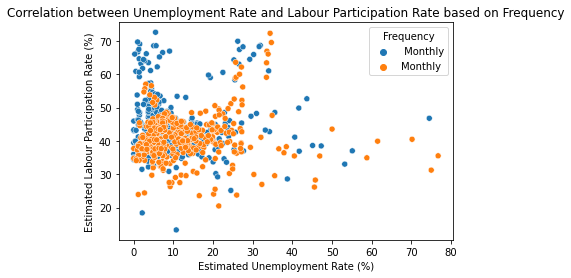

In [63]:
#correlation between Unemployment Rate and Labour Participation Rate based on Frequency

sns.scatterplot(data=data, x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', hue='Frequency')
plt.title('Correlation between Unemployment Rate and Labour Participation Rate based on Frequency')
plt.show()

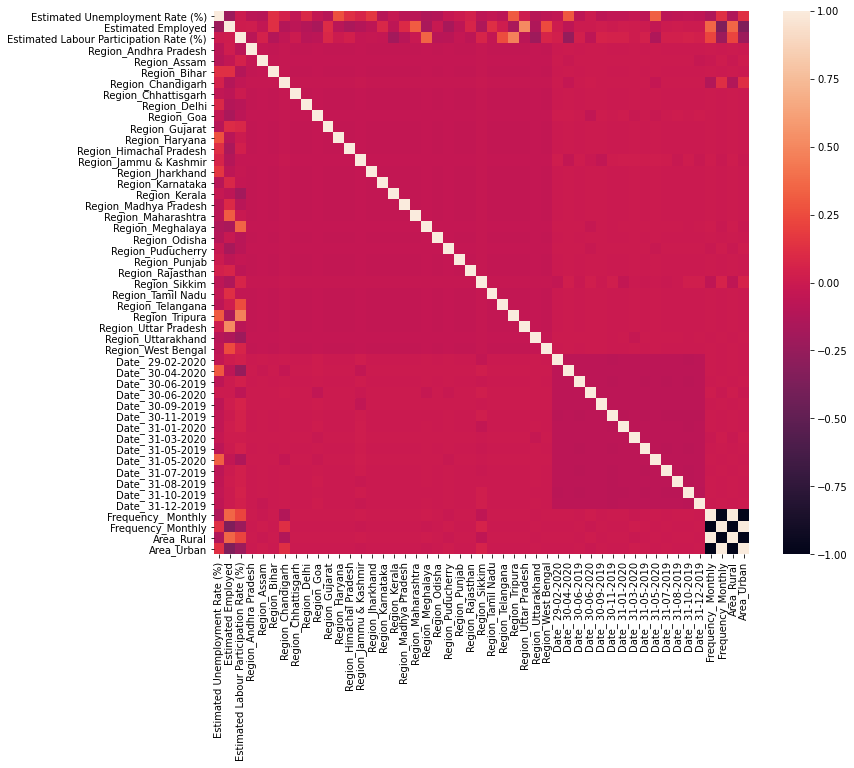

In [62]:
#correlation between features in data

encode=pd.get_dummies(df)
encode
plt.figure(figsize=(12, 10))
sns.heatmap(encode.corr())
plt.show()